## 3-1. k-최근접 이웃 회귀

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

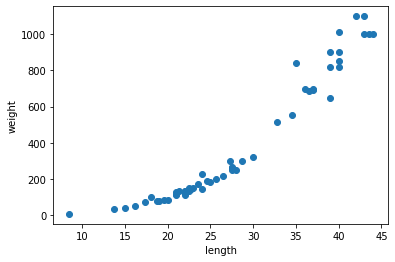

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 길이가 커짐에 따라 무게도 증가한다.

In [ ]:
# 훈련, 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)


사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다.   
perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열이다.  
이를 1개의 열이 있는 2차원 배열로 바꿔야한다. ex) (3,) -> (3,1)

In [ ]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [ ]:
test_array = test_array.reshape(2, 2) # 지정한 크기와 원본 배열의 원소 개수가 다르면 에러가 발생한다.
print(test_array.shape)

(2, 2)


train_input의 크기는 (42,) 이며, 이를 reshape를 이용해 (42, 1)로 바꿔줄 것이다.  
넘파이는 배열의 크기를 자동으로 지정하는 기능을 제공하는데, 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미이다.  
> reshape() 는 배열의 크기를 바꾸는 메서드이다.  
**전체 원소의 개수를 모두 외우지 않아도 되어 편리한 기능**

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


* 결정계수(R^2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target) # 훈련시키기
print(knr.score(test_input, test_target)) # 결정계수

0.992809406101064


In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input) # 테스트 셋에 대한 예측 만들기

mae = mean_absolute_error(test_target, test_prediction) # 타깃과 예측의 절댓값 오차를 평균하여 반환
print(mae)

19.157142857142862


* 과대적합 vs 과소적합

과대적합: 훈련세트에서 점수가 굉장히 좋았는데 테스트에서는 나쁠 때, 훈련 세트에만 잘 맞는 모델이 된다.  
과소적합: 훈련세트보다 테스트에서 점수가 높거나 두 점수가 모두 낮은 경우, 주로 훈련세트와 테스트 세트의 크기가 매우 작을 때 발생한다.

In [ ]:
print(knr.score(train_input, train_target))
# 과소적합 -> 모델을 좀 더 복잡하게 만든다(이웃의 개수 줄이기)

0.9698823289099254


In [ ]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))
# 과소적합 문제 해결

0.9746459963987609


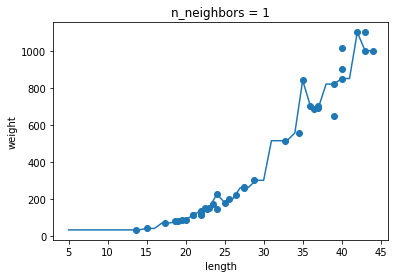

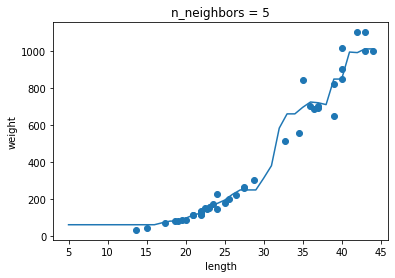

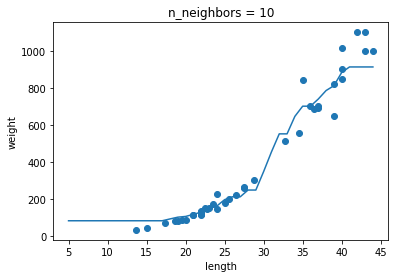

In [ ]:
# 문제 2

knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

## 3-2. 선형 회귀

* k-최근접 이웃의 한계

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)

print(knr.predict([[50]])) # 길이가 50cm 인 농어의 무게 예측 -> 문제발생

[1033.33333333]


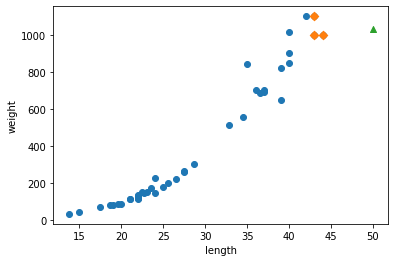

In [ ]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]]) # 50cm 농어의 이웃 구하기

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker ='D')

plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 길이가 커질수록 농어의 무게가 증가하는 경향이 있다.

In [ ]:
print(np.mean(train_target[indexes]))
print(knr.predict([[100]])) # 길이가 100cm인 농어도 예측 무게가 같이 나온다.

1033.3333333333333
[1033.33333333]


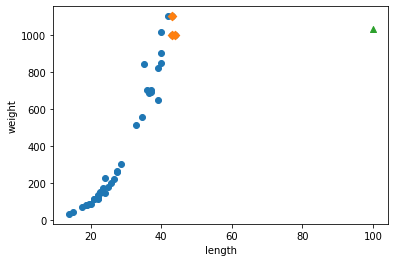

In [ ]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker ='D')

plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 선형 회귀  
훈련 세트 범위를 벗어난 무게도 예측 가능해진다.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
print(lr.coef_, lr.intercept_) # 모델 파라미터

[39.01714496] -709.0186449535477


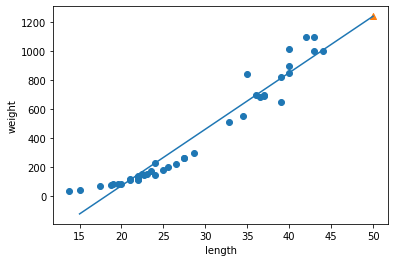

In [ ]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# 전체적으로 과소적합되었다고 볼 수 있다.
# 또한 그래프가 직선이 아닌 곡선이 되어야 좀 더..

0.939846333997604
0.8247503123313558


* 다항회귀  

길이를 제곱한 항이 훈련 세트에 추가 되어야 한다.  
길이와 왕길이의 선형 관계라고 표현 가능

In [ ]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()

lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) # 50 cm 농어에 대한 무게 예측

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


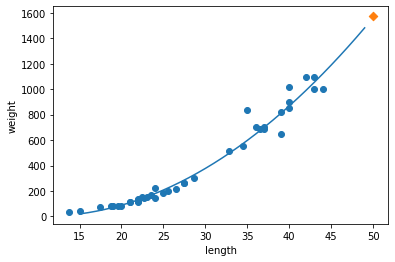

In [ ]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 과소 적합이 남아있는 듯

0.9706807451768623
0.9775935108325122
